# Model Output Notebook

<img style="float:center;" src="https://arcticexpansion.vse.gmu.edu/sites/arcticexpansion.vsnet.gmu.edu/files/images/header5d2.png" width=600px>

### ADCIRC-SWAN Ouput
#### - Steps to follow:
  1. Import Libraries & Assign Paths
  2. Assign Tasks
  3. Save Report

### Description
Read data from ADCIRC output files and plot

---
#### - Usage:
  1. Import Libraries & Assign Paths
  2. Read in data from files:
  3. Add comments/Request feedback
  4. Save Report
  
 ---

#### Import Libraries

In [4]:
import sys;sys.path.append('../adcirc_swan')
from adcirc import adcirc as adc
from utils import *
import pathlib as pl
from importlib import reload
from libs import *
init_notebook_mode()
from IPython.display import IFrame
from plotly.subplots import make_subplots
from scipy.io import loadmat
import matplotlib.tri as tri
import matplotlib
from mpl_toolkits.basemap import Basemap
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes

#### Initialize Initial Conditions

In [2]:
root = pl.Path(r'D:\FHRL_work\Projects\eeslr\modelling\Joaquim')
path = pl.Path(r'C:\Users\tmiesse\Desktop\temp')
#obs = pd.read_csv(path / 'eastern_shore.csv')

# load a output file that ran for the whole storm
ncfile = nc4.Dataset(root  / 'explicit_cd1' / 'swan_HS.63.nc')
#ncfile2 = nc4.Dataset(root / 'no_vege' / 'swan_HS.63.nc')
# model start/end time and frequency
start = '20080825 00:00:00'
freq = '1H'

In [3]:
# eastern shore distance
distance = [0,23.907,52.705,134.814]
nodes = []
lat,lon = 0.371294220000E+02,-0.759533170000E+02
node = find_node_ak(ncfile1,lat,lon)
#for i in range(len(obs)-1,-1,-1):
#    nodes.append(find_node_ak(ncfile,obs['Y'][i],obs['X'][i]))

NameError: name 'ncfile1' is not defined

In [11]:
# this finds the observation data and dumps the data in a dataframe

paths = list((root / 'observation').glob('*'))
obs = pd.DataFrame()
for path in paths:
    file = loadmat(path)
    keys = file.keys()
    for key in keys:
        if 'time' in key: 
            obs['Datetime'] = pd.to_datetime(file[key][0]-719529, unit='D')
            
        elif 'Hm0' in key:
            obs['Hm0_'+path.name] = file[key][0]


In [25]:
# here is where it should be modified

names = {'outputs':'Explicit Vegetation','implicit045':'Implicit 0.045'}#,'implicit055':'Implicit 0.055','implicit080':'Implicit 0.08'}#
colors = ['#009933','#0099ff','#ff00ff','#cc3300']

start1 = pd.to_datetime('2015-10-01 12:00:00')
end1 = pd.to_datetime('2015-10-01 12:10:00')

In [ ]:
fig,ax = plt.subplots(figsize=(12,10))
keys = list(names.keys())


for i in range(0,2):

    ncfile = nc4.Dataset(root / keys[i] / 'swan_HS.63.nc')
    
    hs = pd.DataFrame(index = pd.date_range(start=start,periods=int(len(ncfile.variables['swan_HS'])),freq=freq))
    ii=0
    data = []
    for node in nodes:
        hs['hs_S'+str(ii)] = ncfile.variables['swan_HS'][:,node].data
        
        data.append(hs[hs.columns[ii]][start1:end1].values)
        ii+=1
    ax.plot(distance,data,'.-',color=colors[i],label=names[keys[i]])



    
data2 = [obs[obs.columns[0]].loc[(start1<=obs['Datetime'])&(obs['Datetime']<end1)].values,
        obs[obs.columns[2]].loc[(start1<=obs['Datetime'])&(obs['Datetime']<end1)].values,
        obs[obs.columns[3]].loc[(start1<=obs['Datetime'])&(obs['Datetime']<end1)].values,
        obs[obs.columns[4]].loc[(start1<=obs['Datetime'])&(obs['Datetime']<end1)].values]   

ax.plot(distance,data2,'+',color='black',linewidth=2,markersize=20,label='Observations')    




ax.legend(loc='lower center', bbox_to_anchor=(0.46, -0.15),ncol=6,frameon=False)
ax.set_xlabel('Cross-Shore [m]')
ax.set_ylabel(r'$H_{s}$ [m]')
ax.set_ylim([0,0.5])
ax.set_xlim([-10,200])
plt.show()

In [5]:
levels = np.arange(0,2.01,.1)
dt = pd.date_range(start=start,periods=int(len(ncfile1.variables['swan_HS'][:,node])),freq=freq)

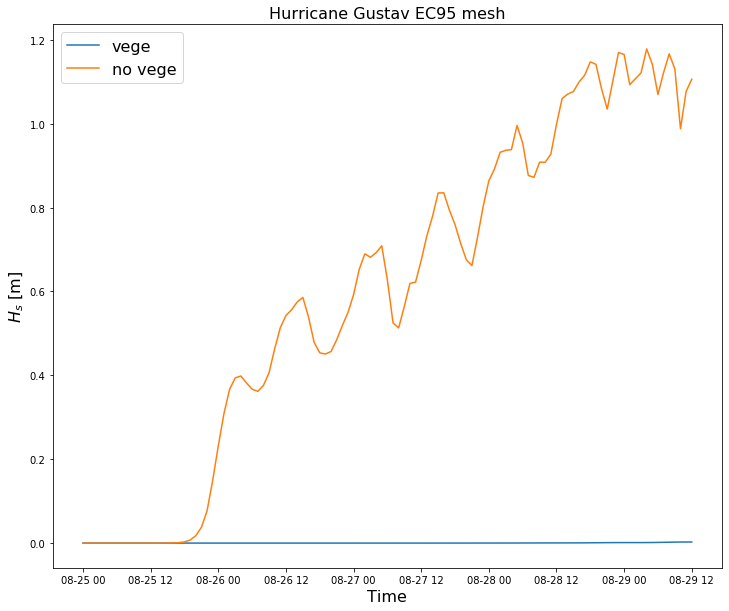

In [20]:
fig,ax = plt.subplots(figsize=(12,10))
ax.plot(dt[:len(ncfile2.variables['swan_HS'][:len(ncfile2.variables['swan_HS'][:,node]),node])],ncfile1.variables['swan_HS'][:len(ncfile2.variables['swan_HS'][:,node]),node],label='vege')
ax.plot(dt[:len(ncfile2.variables['swan_HS'][:,node])],ncfile2.variables['swan_HS'][:,node],label='no vege')
ax.legend(fontsize=16)
ax.set_ylabel(r'$H_{s}$ [m]',fontsize=16)
ax.set_xlabel('Time',fontsize=16)
ax.set_title('Hurricane Gustav EC95 mesh',fontsize=16)
plt.show()

In [3]:
lat1,lat2 = 8, 48
lon1,lon2 = -99, -59.8

es = [37.1175, 37.125,-75.9695, -75.9558]
mgb = [37.1475,37.1555,-75.9485,-75.935]
di = [38.1475,38.152,-75.9575,-75.948]
i = 30
#ncfile = ncfile1
#ncfile = nc4.Dataset(root / keys[0] / 'swan_HS.63.nc')
data1 = ncfile.variables['swan_HS'][i,:]

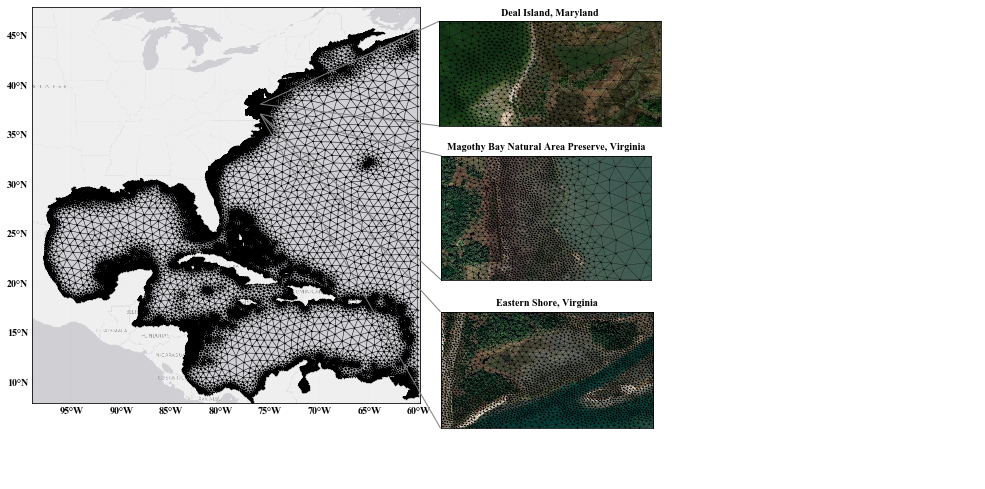

In [36]:
fig = plt.figure(figsize=(11,11))
plt.rcParams["font.family"] = "Times New Roman"

ax = fig.add_axes([0,0.1,1,0.5])
ax0= fig.add_axes([0.45,0,1,0.49],xticks=[],yticks=[],frame_on=False,facecolor=None)
xx = ncfile.variables['x'][:]
yy = ncfile.variables['y'][:]
gridvars = ncfile.variables      
var_element = 'element'
elems = gridvars[var_element][:,:]-1
triang = tri.Triangulation(xx,yy, triangles=elems)
if data1.mask.any():
    point_mask_indices = np.where(data1.mask)
    tri_mask = np.any(np.in1d(elems, point_mask_indices).reshape(-1, 3), axis=1)
    triang.set_mask(tri_mask)

# ----------------------------- US -------------------------------------------
m = Basemap(llcrnrlat=lat1,urcrnrlat=lat2,
            llcrnrlon=lon1,urcrnrlon=lon2,resolution='h', epsg = 4269,ax=ax)
m.arcgisimage(service='Canvas/World_Light_Gray_Base', xpixels=600, verbose= False,ax=ax)
m.drawparallels(range(0, 100, 5), linewidth=0.01,labels=[1,0,0,0], color='#595959')
m.drawmeridians(range(0, 360, 5), linewidth=0.01, labels=[0,0,0,1],zorder=3)
ax.triplot(xx,yy,triang.triangles,'.-',color='k',linewidth=0.5,markersize=1)

# ---------------------------- Eastern Shore -----------------------------------
ax_es = zoomed_inset_axes(ax0,40, loc=4,bbox_to_anchor=(0.485, 0.125, 0.25, 0.45),
                          bbox_transform=ax0.transAxes)
m2 = Basemap(llcrnrlat=es[0],urcrnrlat=es[1],
            llcrnrlon=es[2],urcrnrlon=es[3], ax=ax_es)

m2.arcgisimage(service='World_Imagery',ax=ax_es)
ax_es.triplot(xx,yy,triang.triangles,'.-',color='#000000',linewidth=0.25,markersize=0.75)
ax_es.set_title('Eastern Shore, Virginia',fontsize=10)

mark_inset(ax, ax_es, loc1=2, loc2=3, fc="none", ec="0.5",color='k')

# ---------------------------- Magothy Bay -----------------------------------
ax_mgb = zoomed_inset_axes(ax0,40, loc=5,bbox_to_anchor=(0.48, 0.455, 0.25, 0.45),
                           bbox_transform=ax0.transAxes)
m3 = Basemap(llcrnrlat=mgb[0],urcrnrlat=mgb[1],
            llcrnrlon=mgb[2],urcrnrlon=mgb[3], ax=ax_mgb)
m3.arcgisimage(service='World_Imagery',ax=ax_mgb)
ax_mgb.triplot(xx,yy,triang.triangles,'.-',color='#000000',linewidth=0.25,markersize=0.75)
ax_mgb.set_title('Magothy Bay Natural Area Preserve, Virginia',fontsize=10)

mark_inset(ax, ax_mgb, loc1=2, loc2=3, fc="none", ec="0.5",color='k')


# ---------------------------- Deal Island -----------------------------------
ax_di = zoomed_inset_axes(ax0,60, loc='upper right',bbox_to_anchor=(0.5, 0.75, 0.25, 0.45),
                          bbox_transform=ax0.transAxes)
m4 = Basemap(llcrnrlat=di[0],urcrnrlat=di[1],
            llcrnrlon=di[2],urcrnrlon=di[3], ax=ax_di)
m4.arcgisimage(service='World_Imagery',ax=ax_di)
ax_di.triplot(xx,yy,triang.triangles,'.-',color='#000000',linewidth=0.25,markersize=0.75)
ax_di.set_title('Deal Island, Maryland',fontsize=10)

mark_inset(ax, ax_di, loc1=2, loc2=3, fc="none", ec="0.5",color='k')



#cb = plt.colorbar(cmap='jet',fraction=0.026,pad=0.04) 
#cb.set_label('Hs (m)',fontsize=10)
plt.savefig('mesh.png')#,dpi=450,bbox_inches = 'tight', pad_inches = 0.1)
plt.show(fig)

In [26]:
lat1,lat2 = 36, 38
lon1,lon2 = -76, -74

i = 30
ncfile = ncfile2
#ncfile = nc4.Dataset(root / keys[0] / 'swan_HS.63.nc')
data1 = ncfile.variables['swan_HS'][i,:]

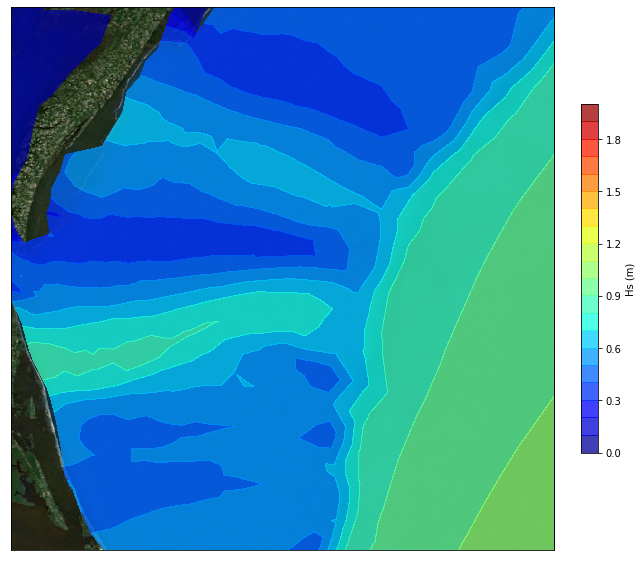

In [27]:
fig,ax = plt.subplots(figsize=(12,10))
xx = ncfile.variables['x'][:]
yy = ncfile.variables['y'][:]
gridvars = ncfile.variables      
var_element = 'element'
elems = gridvars[var_element][:,:]-1
m = Basemap(projection='cyl',llcrnrlat=lat1,urcrnrlat=lat2,
            llcrnrlon=lon1,urcrnrlon=lon2,resolution='h', epsg = 4269)
#data2 = netcdf_file.variables['zeta'][:]

triang = tri.Triangulation(xx,yy, triangles=elems)
m.arcgisimage(service='ESRI_Imagery_World_2D', xpixels=600, verbose= False)
#m.drawcoastlines(color='k')
if data1.mask.any():
    point_mask_indices = np.where(data1.mask)
    tri_mask = np.any(np.in1d(elems, point_mask_indices).reshape(-1, 3), axis=1)
    triang.set_mask(tri_mask)
plt.xlim([lon1, lon2])
plt.ylim([lat1, lat2])    
plt.tricontourf(triang, data1, levels=levels,alpha=0.75,
                vmin=np.min(levels), vmax=np.max(levels), aspect='auto',cmap='jet')
cb = plt.colorbar(cmap='jet',fraction=0.026,pad=0.04) 
cb.set_label('Hs (m)',fontsize=10)